In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        return self.net(x)

In [19]:
# Визначаємо пристрій
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Створюємо модель і завантажуємо ваги
model = PINN().to(device)
model.load_state_dict(torch.load("pinn_model_task_1_2.pth", map_location=device))
model.eval()

PINN(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [20]:
# Функція для передбачення одного значення u(x)
def predict_single(x_value):
    x_tensor = torch.tensor([x_value], dtype=torch.float32, device=device).view(-1, 1)
    with torch.no_grad():
        return model(x_tensor).cpu().numpy()[0, 0]

In [21]:
# Генеруємо нові значення x
x_new = np.linspace(0, 1, 50)
x_new_sorted_indices = np.argsort(x_new)
x_new = x_new[x_new_sorted_indices]

x_new_t = torch.tensor(x_new, dtype=torch.float32, device=device).view(-1, 1)

In [22]:
# Передбачення
with torch.no_grad():
    u_pred_new = model(x_new_t).cpu().numpy()
    u_pred_new = u_pred_new[x_new_sorted_indices]

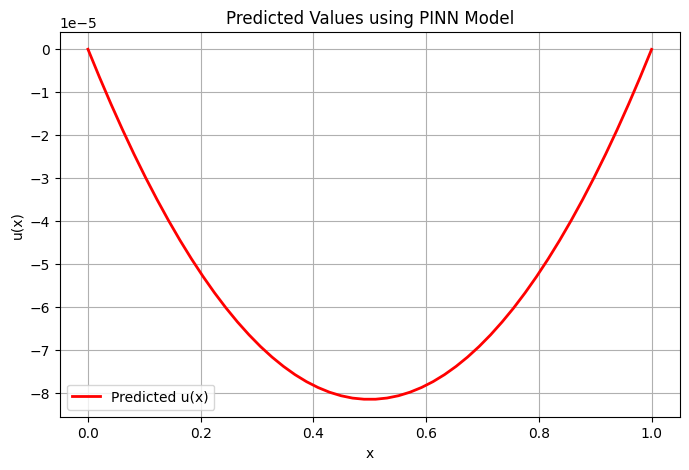

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(x_new, u_pred_new, label="Predicted u(x)", color='red', linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Predicted Values using PINN Model")
plt.legend()
plt.grid()
plt.show()